# SHREEYA PAHUNE
## 2018113011

# Prey-predator model

Prey-Predator (also known in literature as Lotka-Volterra model) is a popular model to study dynamics of a system consisting of two antogonists, in this case rabbits (prey) and foxes (predator). 

The dynamics of the sytem are determined by interactions within and between the prey and predator populations. The intra-species interactions are (natural) birth and (natural) death rates, while inter-species interactions are the predation of prey (i.e. predator 'eats' prey for its survival!). Let $X$ denote the population size of prey and $Y$ denote the popluation size of predator. 



For the population  dynamics of the prey: prey replicates at a rate that is controlled by abundance of the natural resources (rabbits need grass); we assume that these natural resources are abundant and remain at the same level throughout. Prey might die of natural causes (old age) or is eaten by predator. Thus the dynamics are reasonably modeled as:
$$ \frac{dX}{dt} = \alpha X - \beta X Y $$

For the population dynamics of predator: population of predator is expected increase linearly with its own size, and also on the population size of prey (since it needs prey as food). The natural death rate of the population depends on its own population size. Thus prey population size dynamics may be modeled as:
$$ \frac{dY}{dt} = \gamma X Y - \delta Y $$

Clearly the dynamics of the model are dependent on the four positive constants $\alpha,~\beta,~\gamma$, and $\delta$, which are to be inferred from the feild data.

We will study and understand the population dynamics of this model (i.e. $X(t)$ and $Y(t)$). We will set these four parameters to value of 1.

## Summary of tasks
1. [__For the model, set parameter values__](#parameters)
2. [__Plot of rate vector field__](#vectorfield)
3. [__Find steady states__](#steadystates)
3. [__Time evolution of system__](#timeevolution)
4. [__Find Jacobian__](#jacobian)
4. [__Brief interlude: Geometric Intepretation of matrix operation__](#geometric)
5. [__Find eigen values and eigen vectors for Jacobain Matrix__](#eigensystem)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import sympy

***
<a id='parameters'>
## Task: Set by hand the value of the 4 parameter values from the last four digits of your IIIT roll number
</a>
***
Add 1 to each digit and multiply by 2 and set this value to the parameters.

__alternatively: use $(\alpha,\beta,\gamma,\delta)=(2,1,1,2)$__

In [3]:
alpha=2
beta=1
gamma=1
delta=2

***
<a id='vectorfield'>
## Task: Plot the vector $\left(\frac{dX}{dt},\frac{dY}{dt}\right)$ in XY plane
</a>
***
From the this plot, qualitatively say what is the behaviour! 


Hints (that *might* be useful for you to organize):
1. It will be useful for later to write the function `rate_vector(r,t,*cons)` where `r` is the list [X,Y], `t` is time (dummy for now) and `cons` is the __tuple__ of parameters; output will be the list $\left[\frac{dX}{dt}, \frac{dY}{dt}\right]$
1. The x-range and y-range are to be determined by the steady state position determined in previous task. 
2. For plotting the arrows use the function `arrow(x,y,dx,dy)` to draw arrow from point $(x,y)$ to point $(x+dx,y+dy)$.

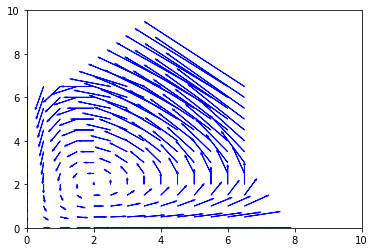

In [4]:
plt.xlim(0,10)
plt.ylim(0,10)

for x in np.arange(0, 7, 0.5):
    for y in np.arange(0, 7, 0.5):
        r=[alpha*x - beta*x*y, gamma*x*y - delta*y]
        plt.arrow(x, y, r[0]/10, r[1]/10, head_width=0.05, head_length=0.1, color='b')
    
plt.show()   


***
<a id='steadystates'>
## Task: Find the steady states (where $\left(\frac{dX}{dt},\frac{dY}{dt}\right)=(0,0)$) by numerically solving the two coupled equations for the two unknowns $X,Y$ 
</a>
***

In [5]:
from scipy.optimize import fsolve

def roots(x):
    f=np.empty((2))
    f = [alpha*x[0] - beta*x[0]*x[1],  gamma*x[0]*x[1] - delta*x[1]]
    return f

steady_state1 = fsolve(roots, [1.5,1.5])
print (steady_state1)
steady_state2 = fsolve(roots, [0.5,0.5])
print (steady_state2)

[2. 2.]
[0. 0.]


***
<a id='timeevolution'>
## Task: Integrate the rate laws and find the evolution of system
</a>
***
Plot $X(t)$ and $Y(t)$ for some choosen values of $X(t=0)$ and $Y(t=0)$. And describe its behaviour in your own words. 

Hint: use `scipy.integrate.odeint` function

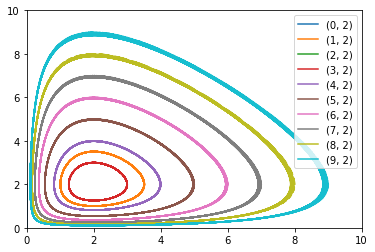

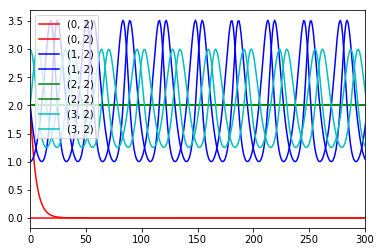

In [6]:
t=np.arange(1,100, 0.1)

for i in np.arange(0,10):
    x=[i,2]
    sol = scipy.integrate.odeint(lambda x,t: [alpha*x[0] - beta*x[0]*x[1],  gamma*x[0]*x[1] - delta*x[1]],  x, t)

    plt.xlim(0,10)
    plt.ylim(0,10)

    plt.plot(sol[:, 0], sol[:, 1], label='(' + str(i) + ', 2)' )
plt.legend()
plt.show()

c = ['r', 'b', 'g', 'c']
for i in np.arange(0,4):
    x=[i,2]
    sol = scipy.integrate.odeint(lambda x,t: [alpha*x[0] - beta*x[0]*x[1],  gamma*x[0]*x[1] - delta*x[1]],  x, t)

    plt.xlim(0, 300)

    plt.plot(sol[:, 0], label='(' + str(i) + ', 2)', color=c[i])
    plt.plot(sol[:, 1], label='(' + str(i) + ', 2)', color=c[i])
plt.legend()
plt.show()


***
<a id='jacobian'>
## Task: Using SymPy, find the Jacobian (at any arbitrary point), and hence the Jacobian at steady state(/s)
</a>
***

In [7]:
from sympy import Matrix
from sympy.abc import x, y

f1 = Matrix([alpha*x - beta*x*y , gamma*x*y - delta*y])
f2 = Matrix([x, y])
J = f1.jacobian(f2)

print(J)


Matrix([[-y + 2, -x], [y, x - 2]])


In [8]:
J1 = (J.subs(x, steady_state1[0])).subs(y, steady_state1[1])  #steady state 1 [2,2]

print(J1)

J1_eigen = np.array(J1).astype(np.float64)
np.linalg.eig(J1_eigen)

Matrix([[0, -2.00000000000000], [2.00000000000000, 0]])


(array([0.+2.j, 0.-2.j]),
 array([[ 0.        -0.70710678j,  0.        +0.70710678j],
        [-0.70710678+0.j        , -0.70710678-0.j        ]]))

In [9]:
J1 = (J.subs(x, steady_state2[0])).subs(y, steady_state2[1])  #steady state 1 [0,0]

print(J1)

J1_eigen = np.array(J1).astype(np.float64)
np.linalg.eig(J1_eigen)

Matrix([[2, 0], [0.0, -2.00000000000000]])


(array([ 2., -2.]), array([[1., 0.],
        [0., 1.]]))

***
<a id='geometric'>
## Task: Geometric Interpretation of Matrix (through its operation on vectors)
</a>
***

One of the common operations is matrix operation on vector, and many of the times of specific interest is multiple repeated operations of matrix on vector. 

Consider $\textbf A$, an arbitrary $2\times 2$ matrix. For a arbirtary unit vector $\vec x$, plot $\textbf A \vec x$. From this plot, can you generalise the operation $\textbf A \vec x$.

[-3.  9.]
[[-0.70710678 -0.58123819]
 [ 0.70710678 -0.81373347]]


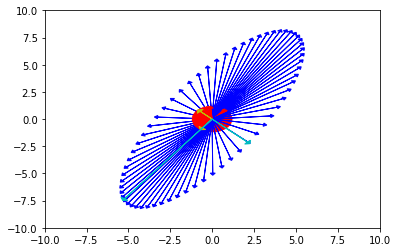

In [10]:
import math

A = [[2,5],[7,4]]

plt.xlim(-10,10)
plt.ylim(-10,10)

for i in np.arange(0, 6.28, 0.1):
    x=[math.sin(i), math.cos(i)]
    b=np.dot(A, x)
    plt.arrow(0, 0, b[0], b[1], color='b', head_width=0.3, head_length=0.2)
    plt.arrow(0, 0, x[0], x[1], color='r', head_width=0.3, head_length=0.2)

w, v = np.linalg.eig(A)
print(w)
print(v)

plt.arrow(0, 0, v[0][0], v[1][0], color='y', head_width=0.5, head_length=0.2)
plt.arrow(0, 0, v[0][1], v[1][1], color='y', head_width=0.5, head_length=0.2)

plt.arrow(0, 0, w[0]*v[0][0], w[0]*v[1][0], color='c', head_width=0.5, head_length=0.2)
plt.arrow(0, 0, w[1]*v[0][1], w[1]*v[1][1], color='c', head_width=0.5, head_length=0.2)

plt.show() #ellipse of axis along eigen vectors with sizes of lambda1 and lambda 2



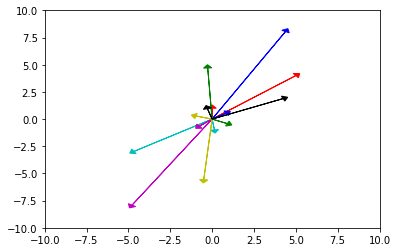

In [11]:
A = [[2,5],[7,4]]
c = ['r', 'b', 'g', 'c', 'm', 'y', 'k']

plt.xlim(-10,10)
plt.ylim(-10,10)

for i in np.arange(0, 6.28, 1):
    x=[math.sin(i), math.cos(i)]
    b=np.dot(A, x)
    plt.arrow(0,0,b[0],b[1], color=c[int(i)], head_width=0.5, head_length=0.3)
    plt.arrow(0,0,x[0],x[1], color=c[int(i)], head_width=0.5, head_length=0.3)

plt.show()

Let matrix be $\textbf{A}$ of size $N\times N$ and column vector $\vec x$ of $N$ rows. Of interest is understanding $\textbf A \vec x$ and $\textbf A^n \vec x$. A common solution is to find the eigen values and eigen vectors of matrix $\textbf A$, i.e. solutions of eigen system $\textbf A \vec v = \lambda \vec v$ allows for $N$ solutions i.e.  pairs $(\lambda_i,\vec v_i)$ solve $\textbf A \vec v_i = \lambda_i \vec v_i$ for $1\le i \le N$, such that $\lambda_i \le \lambda_j$ when $i \le j$. When determinant of matrix is not zero (i.e. $\det \textbf A \ne 0$), the set of  vectors $\{\vec v_i,~i\in[1,N]\}$ form linearly independent set, and can act as basis vectors. [__Gram-Smidt Orthoganlization__](https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process) can convert these eigen vectors into ortho-normal vectors, i.e. $\vec v_i \cdot \vec v_j = \delta_{i,j}$, where Kroneker delta function $\delta_{i,j}=1$ when $i=j$ and 0 otherwise.

Any vector $\vec x$ can be written as linear combination of such basis vectors, i.e. $\vec x = \sum_{i=1}^N c^{(0)}_i \vec v_i$ with constants $c^{(0)}_i$. So that $\textbf A \vec x = \sum_{i=1}^N c^{(1)}_i \vec v_i$, with $c^{(1)}_i = \lambda_i c^{(0)}_i$. For a repeated operation of $\textbf A$, we have $\textbf A^k \vec x = \sum_{i=1}^N c^{(k)}_i \vec v_i$ with $c^{(k)}_i = \lambda^k_i c^{(0)}_i$. 

For the matrix $\textbf A$, find the eigen values and eigen vectors. Draw projection of an arbitrary unit vector $\vec x$ onto the eigen vectors. Do the same for $\vec b$ where $\vec b = \textbf A \vec x$. Try for a few cases of $\vec x$ and see if the above statements regarding $A^k\vec x$ are true (for $k=1$).

[-3.  9.]
[[-0.70710678 -0.58123819]
 [ 0.70710678 -0.81373347]]



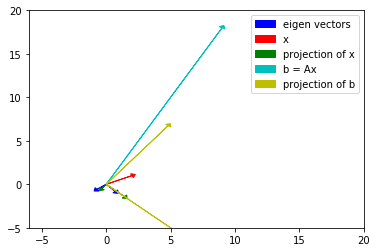

In [13]:
A = [[2,5],[7,4]]
x = [2,1]

b =  np.dot(A, x)
w, v = np.linalg.eig(A)

print(w)
print(v)
print()

plt.xlim(-6, 20)
plt.ylim(-5, 20)

#PLOT EIGEN VECTORS
arrow1 = plt.arrow(0,0,v[0][0],v[0][1], color='b', head_width=0.5, head_length=0.3)
plt.arrow(0, 0, v[1][0], v[1][1], color='b', head_width=0.5, head_length=0.3)

#PLOT x
arrow2 = plt.arrow(0, 0, x[0], x[1], color='r', head_width=0.5, head_length=0.3)

#PLOT b
arrow5 = plt.arrow(0, 0, b[0], b[1], color='c', head_width=0.5, head_length=0.3)

#PLOT PROJECTION OF x
dp1 = np.dot(x, v[0])
mgn1 = np.sqrt(v[0][0]**2 + v[1][0]**2)
arrow3 = plt.arrow(0, 0, dp1*v[0][0]/mgn1, dp1*v[1][0]/mgn1, color='g', head_width=0.5, head_length=0.3)

dp2 = np.dot(x, v[1])
mgn2 = np.sqrt(v[0][1]**2 + v[1][1]**2)
plt.arrow(0, 0, dp2*v[0][1]/mgn2, dp2*v[1][1]/mgn2, color='g', head_width=0.5, head_length=0.3)

#PLOT PROJECTION OF b
dp_b1 = np.dot(b, v[0])
arrow4 = plt.arrow(0, 0, dp_b1*v[0][0]/mgn1, dp_b1*v[1][0]/mgn1, color='y', head_width=0.5, head_length=0.3)

dp_b2 = np.dot(b, v[1])
plt.arrow(0, 0, dp_b2*v[0][1]/mgn2, dp_b2*v[1][1]/mgn2, color='y', head_width=0.5, head_length=0.3)


plt.legend([arrow1, arrow2, arrow3, arrow5, arrow4], ['eigen vectors', 'x', 'projection of x', 'b = Ax', 'projection of b'])
plt.show()


***
<a id='eigensystem'>
## Task: Find the value of the Jacobian at the steady state(or states), and find the eigenvalues and corresponding eigenvectors
</a>
***

With these eigen values and eigen values, determine the behaviour of the system in the neighbourhood of each steady state.